Autor: Gabriel de Sousa Botelho

Formação: Cientista da Computação pela UFC

Contato:
  
  📧 gabrielsbotelho12@gmail.com
  
  👉 [LinkedIn](https://www.linkedin.com/in/gabriel-botelhoo/)
  
  👉 [Github](https://github.com/GabrielSBotelho)



# Projeto Clusterização de Perfis de Clientes de Cartão de Crédito

* Este projeto tem como objetivo identificar nos dados de cartão de crédito possíveis perfis de clientes através da técnica de clusterização.

<h3>Variáveis do dataset</h3>

* **CUST ID**: Identificação do titular do cartão de crédito (categórico)

* **BALANCE** : Valor do saldo restante em sua conta para fazer compras (
* **BALANCE FREQUENCY** : Com que frequência o Saldo é atualizado, pontuação entre 0 e 1 (1 = atualizado com frequência, 0 = não atualizado com frequência)

* **PURCHASES** : Quantidade de compras feitas na conta

* **ONE OFF PURCHASES** : Valor máximo de compra feito de uma só vez

* **INSTALLMENTS PURCHASES** : Valor da compra parcelado

* **CASH ADVANCE** : Dinheiro adiantado dado pelo usuário

* **PURCHASES FREQUENCY**: Com que frequência as Compras estão sendo feitas, pontuação entre 0 e 1 (1 = comprada com frequência, 0 = comprada com pouca frequência)

* **ONE OFF PURCHASES FREQUENCY**: Com que frequência as compras acontecem de uma só vez (1 = compradas com frequência, 0 = compradas sem frequência)

* **PURCHASES INSTALLMENTS FREQUENCY** : Com que frequência as compras parceladas estão sendo feitas (1 = feito com frequência, 0 = feito com pouca frequência)

* **CASH ADVANCE FREQUENCY**: Com que frequência o dinheiro adiantado está sendo pago

* **CASH ADVANCE TRX** : Número de transações feitas com "Cash in Advanced"

* **PURCHASES TRX** : Número de transações de compra realizadas

* **CREDIT LIMIT** : Limite do Cartão de Crédito por usuário

* **PAYMENTS** : Valor do pagamento feito pelo usuário

* **MINIMUM PAYMENTS** : Valor mínimo de pagamentos feitos pelo usuário

* **PRC FULL PAYMENT** : Percentual do pagamento integral pago pelo usuário

* **TENURE**  : Posse do serviço de cartão de crédito para o usuário

## Importando bibliotecas e dado

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = '/content/drive/MyDrive/Data Science/Dados/Credit Card Dataset/CC GENERAL.csv'
data = pd.read_csv(path)

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.shape

(8950, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Tratamento nos dados

In [7]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
credit_limit_mean = np.mean(data['CREDIT_LIMIT'])
mm_payment_mean = np.mean(data['MINIMUM_PAYMENTS'])

print(f'Média dos valores da coluna CREDIT_LIMIT: {credit_limit_mean:.2f}')
print(f'Média dos valores da coluna MINIMUM_PAYMENTS: {mm_payment_mean:.2f}')

Média dos valores da coluna CREDIT_LIMIT: 4494.45
Média dos valores da coluna MINIMUM_PAYMENTS: 864.21


In [9]:
# A coluna 'CREDIT_LIMIT' só tem um valor faltante para que não seja necessário 
# excluir o valor ele será substituido pela média dos valores da coluna
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(credit_limit_mean)

In [10]:
# Substituindo valores faltante da coluna MINIMUM_PAYMENTS pela média
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(mm_payment_mean)

In [11]:
data.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
data.shape

(8950, 18)

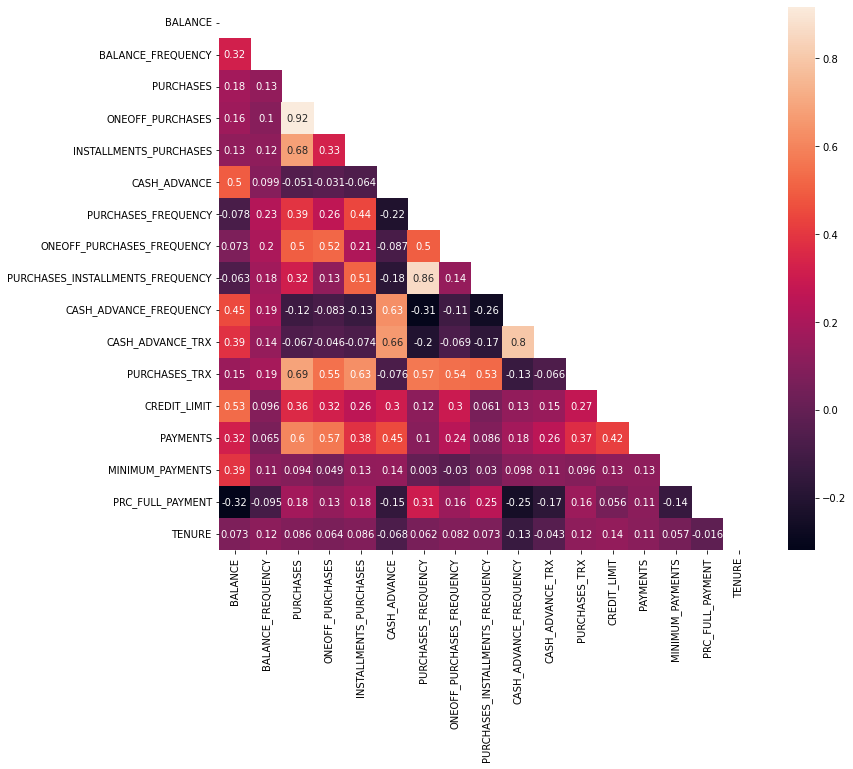

In [13]:
corr= data.corr()

# Selecionando o triangulo superior da matriz de correlação
matrix = np.triu(corr)

# Retirando o triangulo superior ao passar como máscara
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, mask=matrix)

* As variavéis *'ONE OFF PURCHASES'* e *'PURCHASES'* possue uma alta correlação de 92%. 
* As variáveis *'PURCHASES INSTALLMENTS FREQUENCY'* e *'PURCHASES FREQUENCY'* também possuem uma alta correlação de 86%.

> Apesar dessas variáveis serem correlacionadas elas não afetam o modelo, tendo em vista que o que pode acontecer é que vai aumentar a complexidade computacional exigida. 

## EDA (Análise Exploratória dos Dados)

In [14]:
data_numeric = data.drop('CUST_ID', axis=1)
data_numeric.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


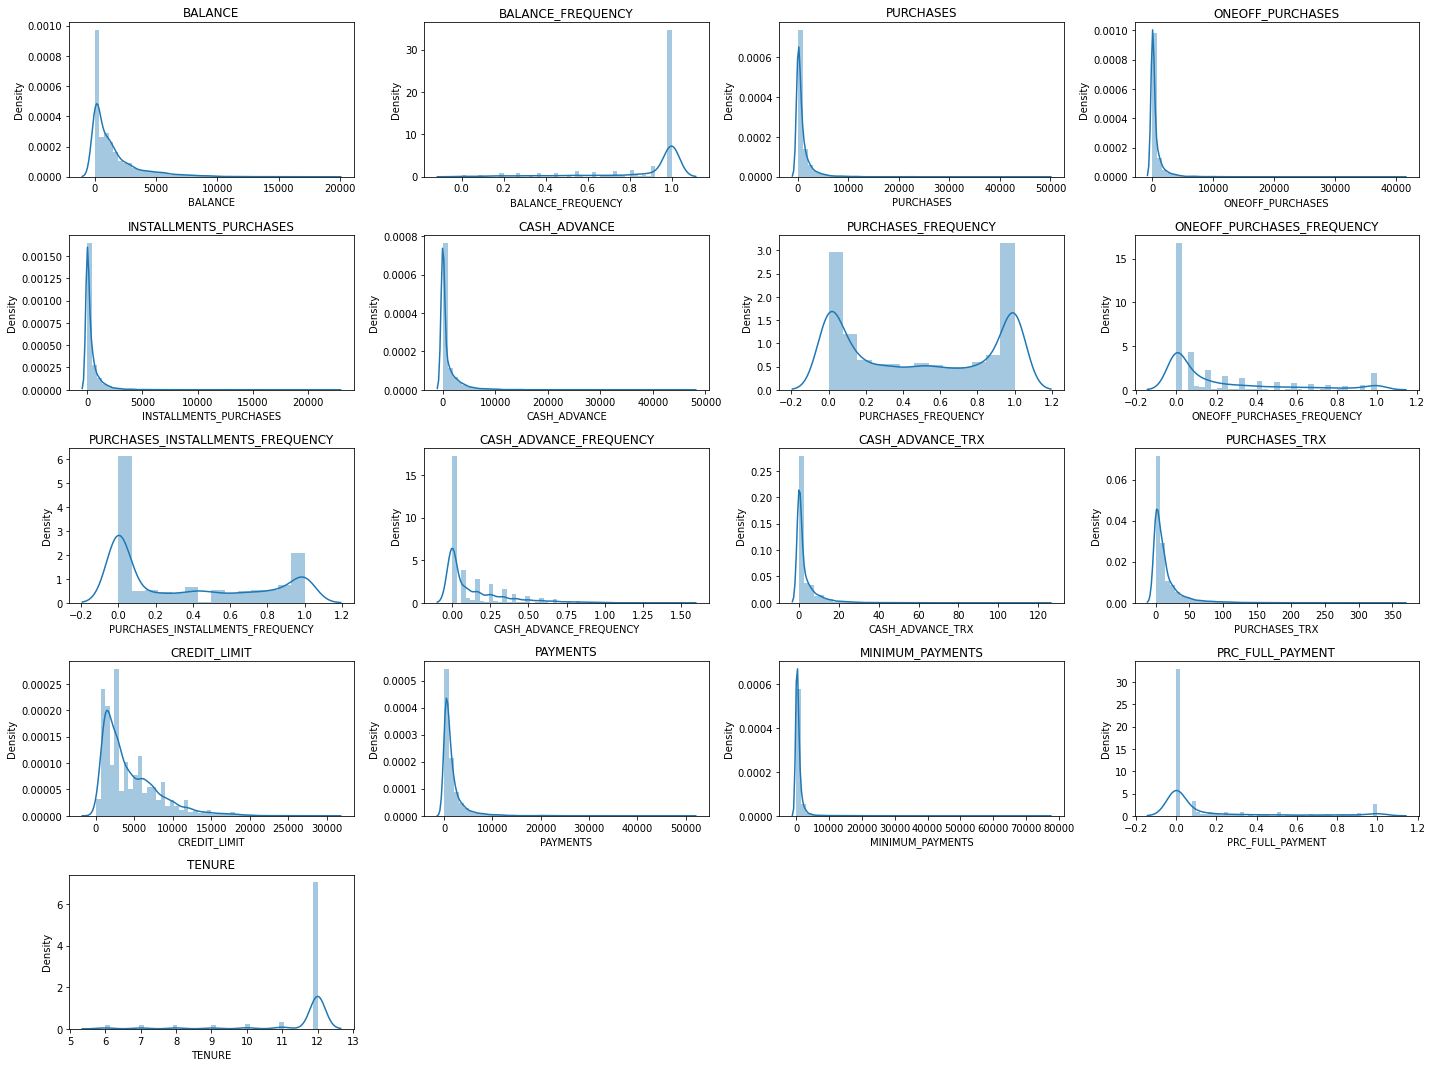

In [15]:
# Visão geral da distribuição de cada variável do dataset
plt.figure(figsize=(20,50))
for i in range(len(data_numeric.columns)):
  plt.subplot(17, 4, i + 1)
  sns.distplot(data_numeric[data_numeric.columns[i]])
  plt.title(data_numeric.columns[i])
plt.tight_layout()

> Acima temos uma visão geral da distribuição de cada variável do dataset. A partir dela é possível entender o comportamento que cada uma possui nos dados. A seguir será analisado com mais detalhes algumas variáveis principais.

<h4>BALANCE</h4>

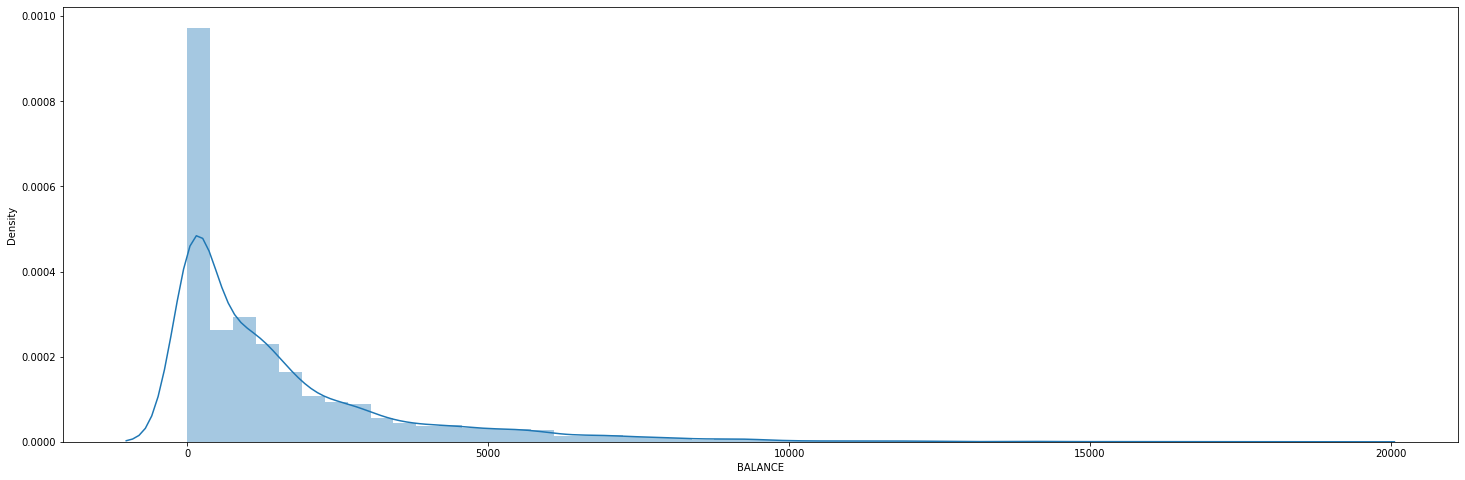

In [16]:
plt.figure(figsize=(25,8))
sns.distplot(data_numeric['BALANCE'])

In [17]:
px.box(data_frame=data_numeric, x='BALANCE')

> A variável *BALANCE* representa a quantidade de dinheiro que o cliente possui em sua conta. No gráfico distplot é possível ver que grande parte dos clientes não deixam algum valor na sua conta. Já no box plot temos que o valor da mediana é de aproximadamente 800, e que o valor máximo é de aproximadamente 5 mil. Existem também alguns *outliers*, com valores de até 19 mil.
 
> A partir dessa análise temos que grande parte dos clientes preferem deixar nenhuma quantia de dinheiro em sua conta. 

<h4>BALANCE FREQUENCY</h4>

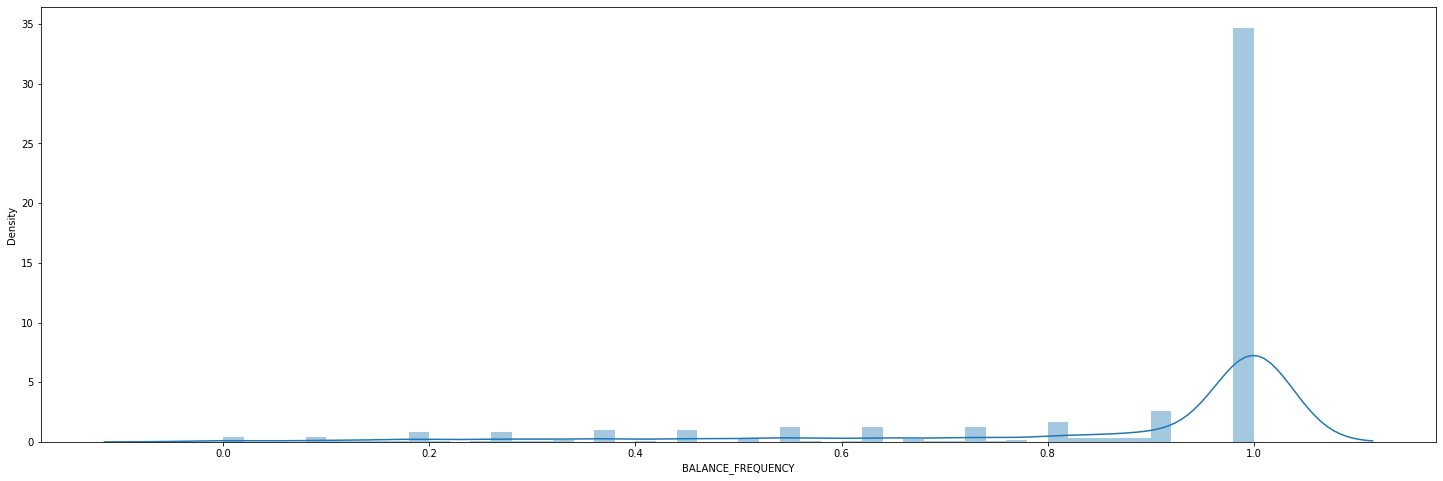

In [18]:
plt.figure(figsize=(25,8))
sns.distplot(data_numeric['BALANCE_FREQUENCY'])

In [19]:
px.box(data_frame=data_numeric, x='BALANCE_FREQUENCY')

> A *BALANCE FREQUENCY* representa a frequência com que o cliente deposita dinheiro em sua conta, ou seja, seu saldo é atualizado. Esta variável é expressa no intervalo de 0 a 1, sendo 0 uma frequência baixa de atualização de saldo e 1 uma frequência alta. A partir dos gráficos temos que a maior parte dos clientes tem seu status em 1. 
 
> Assim, mesmo que os clientes não costumam deixar uma quantidade de dinheiro em sua conta, eles depositam valores com frequência. Isso pode ser interpretado como depósitos para pagar as contas feitas e/ou para poder realizar novas compras.

<h4>PURCHASES</h4>

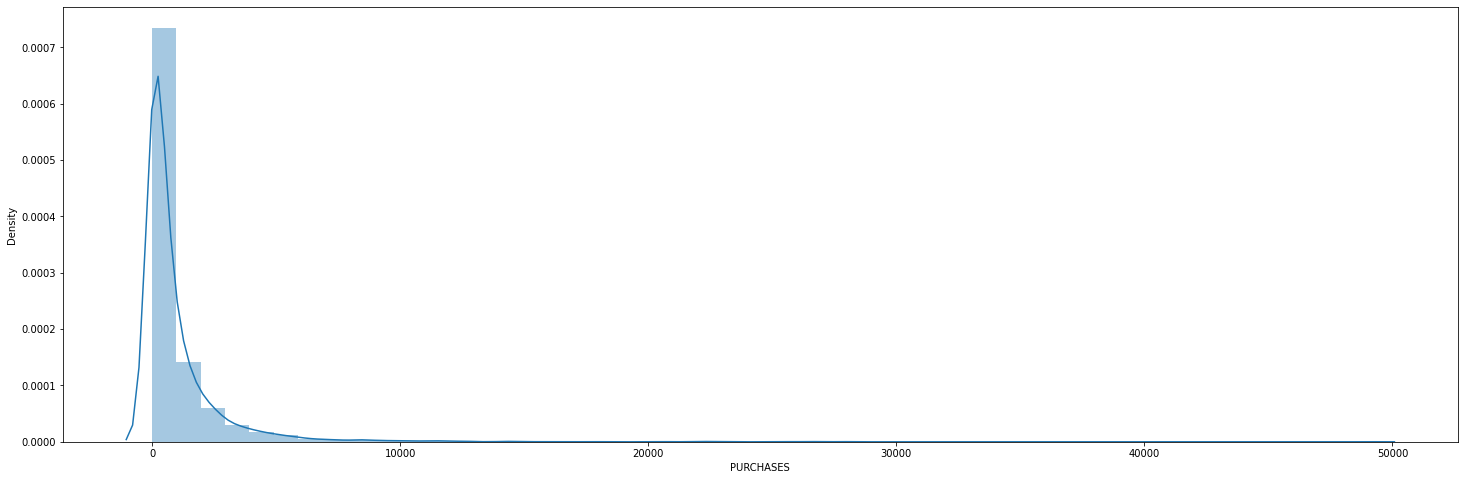

In [20]:
plt.figure(figsize=(25,8))
sns.distplot(data_numeric['PURCHASES'])

In [21]:
px.box(data_frame=data_numeric, x='PURCHASES')

> A variável *PURCHASES* representa a quantidade de compras realizadas por conta. Nos gráficos observamos que existe uma grande concentração abaixo de 3 mil, ou seja, a maior parte dos clientes realizaram menos do que 3 mil compras. No gráfico de box plot é possível ver que a mediana (o valor do meio) está em 361, e que os valores mínimos e máximos variam entre 0 e 2.700. Assim como é possível identificar *outliers* com valores de até 49 mil. 
 
> Portanto, temos que a maioria dos clientes realizam de 0 a 2700 compras no período de tempo analisado.

<h4>PURCHASE FREQUENCY</h4>

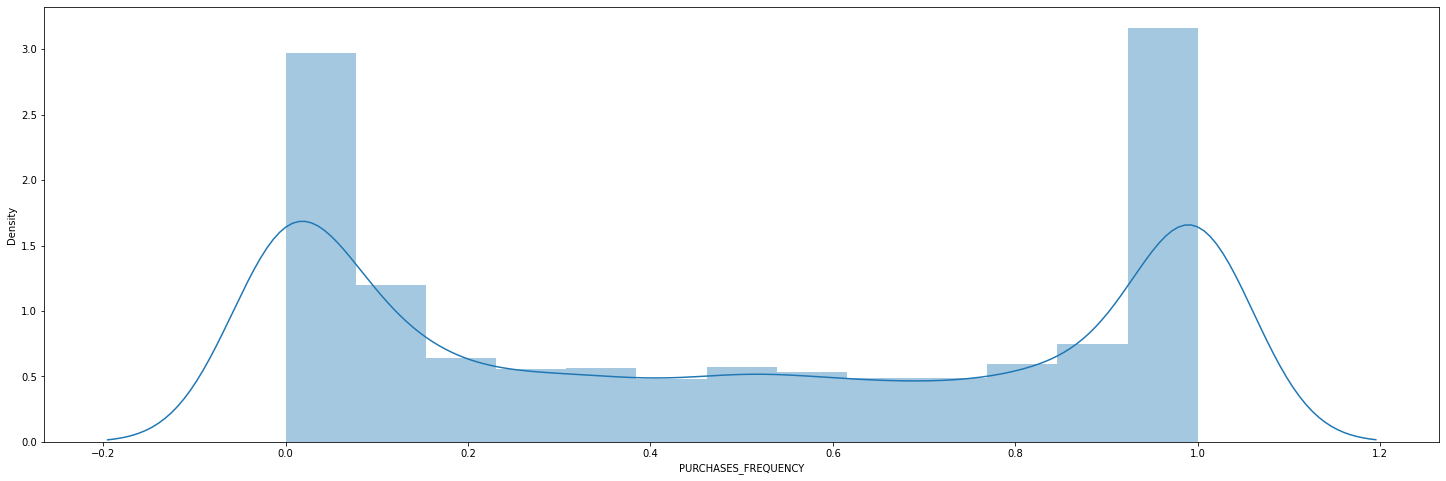

In [22]:
plt.figure(figsize=(25,8))
sns.distplot(data_numeric['PURCHASES_FREQUENCY'])

In [23]:
px.box(data_frame=data_numeric, x='PURCHASES_FREQUENCY')

> A variável *PURCHASE FREQUENCY* representa a frequência com que o cliente realiza alguma compra. Elas são expressadas no intervalo de 0 a 1, sendo 0 frequência baixa de compras realizadas e 1 frequência alta de compras realizadas. Os gráficos apresentam uma distribuição alta nos pólos, significando que uma grande quantidade não realiza muitas compras e uma outra grande quantidade realiza. Temos que a mediana se encontra em 0.5, ou seja, uma quantidade intermediária de compras. 
 
> A partir dessa análise é possível identificar dois públicos para serem trabalhados, os que se encontram no meio e os que se encontram no pico direito do gráfico. Estes dois grupos representam clientes em potencial e clientes fiéis, sendo assim perfis que devem ter uma atenção especial. 

<h4>CREDIT LIMIT</h4>

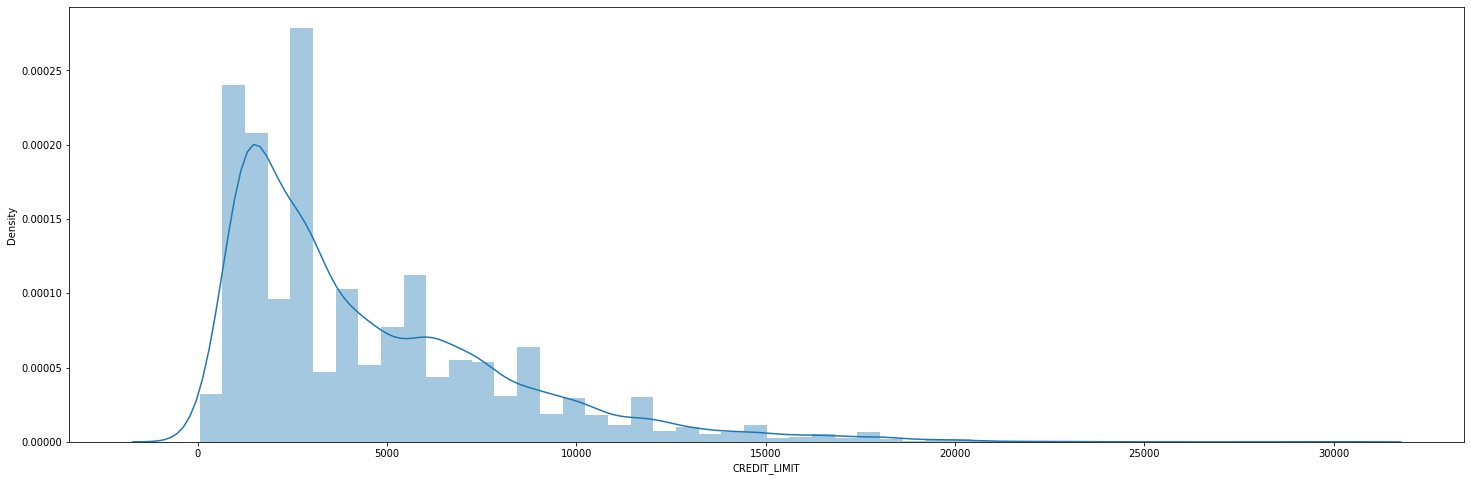

In [24]:
plt.figure(figsize=(25,8))
sns.distplot(data_numeric['CREDIT_LIMIT'])

In [25]:
px.box(data_frame=data_numeric, x='CREDIT_LIMIT')

> A variável *CREDIT LIMIT* representa o limite de crédito que o cliente possui. Podemos analisar nos gráficos que a valor mais comum de limite dos usuários está entre 1.600 e 6.500. Também ó possível identificar uma quantidade pequena porém significativa de cliente com crédito variando de 6.500 mil até 13.500 mil. Além disso temos valores *outliers* de até 30 mil. 

> O limite de crétito pode ser um fator decisivo de utilização do cartão, podendo influenciar na utilização ou não utilização dele. A partir do limite podemos investigar novos pontos como analisar a frequência de compra baseada no limite de crédito do cliente.

In [26]:
# Criando dataset contendo apenas valores de 'PURCHASE FREQUENCY' >= 0.5
data_high_purchase_freq = data_numeric[data_numeric['PURCHASES_FREQUENCY'] >= 0.5]
data_low_purchase_freq = data_numeric[data_numeric['PURCHASES_FREQUENCY'] < 0.5]

In [27]:
print(data_high_purchase_freq.shape)
print(data_low_purchase_freq.shape)

(4542, 17)
(4408, 17)


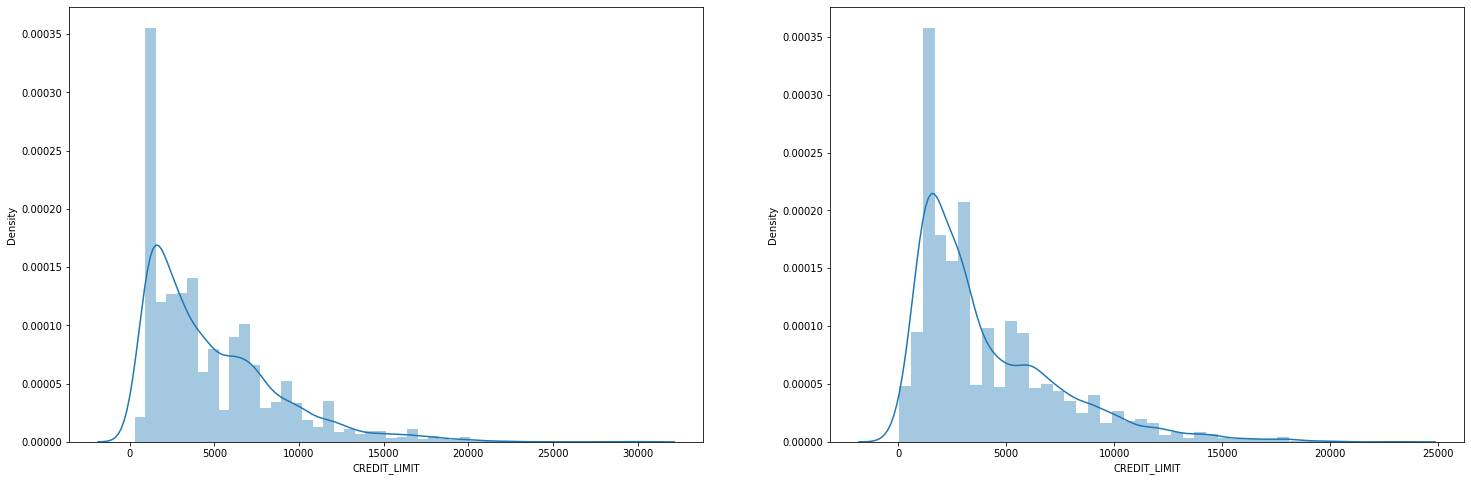

In [28]:
fig, axs = plt.subplots(ncols=2, figsize=(25,8))
sns.distplot(data_high_purchase_freq['CREDIT_LIMIT'], ax=axs[0])
sns.distplot(data_low_purchase_freq['CREDIT_LIMIT'], ax=axs[1])

In [102]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [103]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Box(x=data_low_purchase_freq['CREDIT_LIMIT'], name='Freq < 0.5', marker_color = 'red'),
    row=1, col=1
)

fig.add_trace(
    go.Box(x=data_high_purchase_freq['CREDIT_LIMIT'], name='Freq >= 0.5', marker_color = 'blue'),
    row=1, col=2
)

fig.update_layout(title_text='Valor do limite de crédito baseado na frequência de compra')
fig.show()

> Baseado na frequência de compra os limites dos clientes variam entre 200 e 2.000. Apesar de não ser ter uma diferença grande essa análise pode servir como métrica para analisar a disponibilização de limite dos cliente que usam o cartão assiduamente.

<h4>CASH ADVANCE</h4>

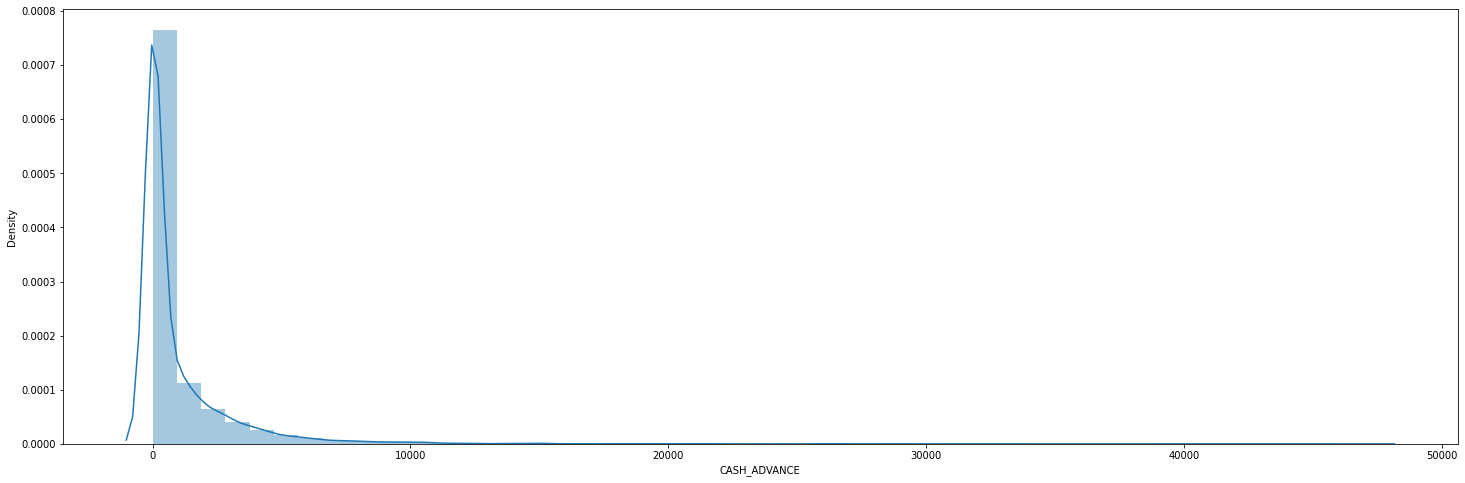

In [44]:
plt.figure(figsize=(25,8))
sns.distplot(data_numeric['CASH_ADVANCE'])

In [45]:
px.box(data_frame=data_numeric, x='CASH_ADVANCE')

> A variável *CASH ADVANCE* representa a quantia que o cliente pagou com antecedência ao realizar a compra. A partir dos gráficos apresentados pode-se afirmar que a maioria dos clientes não costumam pagar parte do produto comprado no ato da compra. 

## Padronizando dados

In [46]:
X = data_numeric

In [47]:
# Padronizando os dados
scaler = StandardScaler()
X_scl = scaler.fit_transform(X)

In [48]:
X_scl

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

## Descobrindo valor de K

In [64]:
def number_of_k(mink, maxk, X, inertias):
  # Descobrindo qual o melhor valor de k
  wcss = []
  for i in range(mink,maxk):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=200)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
  
  # Caso queira saber os valores das inertias
  if(inertias == True):
    print('#'*100)
    print('\t\t\t\t','Valores da Inertia')
    print('#'*100)
    print(wcss)
    print('#'*100)
    print('\n\n')

  # Plot do gráfico do cotovelo para visualizar o melhor valor de k
  plt.figure(figsize=(10,5))
  plt.plot(range(mink,maxk), wcss, 'bx-')
  plt.xlabel('Valor de k')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method showing the optimal k')
  plt.show()

  return

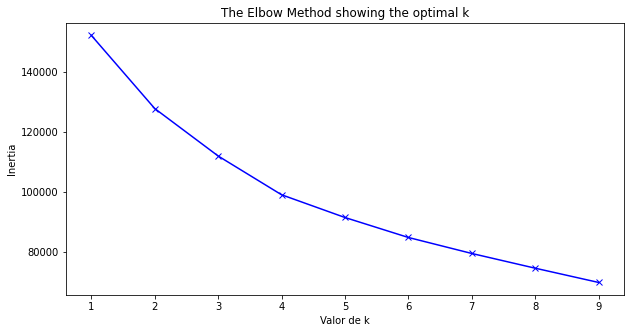

In [65]:
number_of_k(1, 10, X_scl, False)

## K-means

> O valor de k selecionado foi 4.

In [77]:
# Criando modelo
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=200, random_state=0)
kmeans.fit(X_scl)

KMeans(max_iter=200, n_clusters=4)

In [78]:
# Realizando a predição dos rótulos que cada cliente recebeu
labels = kmeans.predict(X_scl)
labels

array([0, 3, 1, ..., 1, 0, 0], dtype=int32)

In [79]:
kmeans.inertia_

99073.93826774803

In [80]:
# Coordenadas dos centros do cluster
kmeans.cluster_centers_

array([[-2.65551629e-01, -3.68944296e-01, -3.43190301e-01,
        -2.30500433e-01, -3.87798111e-01, -1.82691101e-01,
        -7.97822605e-01, -3.89436941e-01, -7.14245761e-01,
        -1.01500402e-01, -1.64607283e-01, -4.74987456e-01,
        -3.34417115e-01, -2.62060256e-01, -1.19249231e-01,
        -2.58865702e-01, -5.29718263e-02],
       [-3.21688457e-01,  2.42573999e-01,  1.09043960e-01,
         9.26320814e-04,  2.55903798e-01, -3.66372614e-01,
         9.83720816e-01,  3.17152671e-01,  8.74137767e-01,
        -4.62598760e-01, -3.60303396e-01,  2.96985169e-01,
        -7.72980064e-02, -1.38501975e-01, -9.18443871e-02,
         3.95041454e-01,  5.77439285e-02],
       [ 9.54484507e-01,  4.62693629e-01,  3.12584465e+00,
         2.71325131e+00,  2.40646962e+00, -1.55090594e-01,
         1.13633760e+00,  1.79865349e+00,  1.06591778e+00,
        -3.19095705e-01, -1.70458235e-01,  3.00325068e+00,
         1.42988161e+00,  1.91909626e+00,  4.77420629e-01,
         4.54702830e-01,  3.2

In [81]:
# Número de iterações realizadas
kmeans.n_iter_

34

In [82]:
# Criando dataset contendo os clusters centers
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[data_numeric.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.265552,-0.368944,-0.343190,-0.230500,-0.387798,-0.182691,-0.797823,-0.389437,-0.714246,-0.101500,-0.164607,-0.474987,-0.334417,-0.262060,-0.119249,-0.258866,-0.052972
1,-0.321688,0.242574,0.109044,0.000926,0.255904,-0.366373,0.983721,0.317153,0.874138,-0.462599,-0.360303,0.296985,-0.077298,-0.138502,-0.091844,0.395041,0.057744
2,0.954485,0.462694,3.125845,2.713251,2.406470,-0.155091,1.136338,1.798653,1.065918,-0.319096,-0.170458,3.003251,1.429882,1.919096,0.477421,0.454703,0.324140
3,1.459578,0.384753,-0.234638,-0.163914,-0.253747,1.688972,-0.504848,-0.212939,-0.450201,1.745948,1.617143,-0.283580,0.838968,0.603821,0.490910,-0.406367,-0.097146


In [83]:
# Transformandos os dados padronizados para o formato original
data_cluster_centers = scaler.inverse_transform(cluster_centers)
data_cluster_centers = pd.DataFrame(data=data_cluster_centers, columns=[data_numeric.columns])
data_cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1011.751528,0.789871,269.973466,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,3277.703165,974.505090,586.301239,0.078001,11.446429
1,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.167072,0.269258,11.594595
2,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100
3,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312


> Utilizando os pontos centrais dos clusters obtidos é possível traçar alguns tipos de perfis de cliente. Com o k = 4, conseguimos 4 clusters que podem ser classificados como 4 perfis diferentes. É levado em consideração para essa análise algumas características principais como, *balance frequency, purchases frequency e credit limit*. Desta forma, temos:

* ***Usuário Bronze (Cluster 0)***
  * Cliente que possui uma baixa frequência de compras, um limite pequeno e uma atualização de saldo baixa.

* ***Usuário Prata (Cluster 1)***:
  * Cliente que realiza compras com recorrência, possui um limite intermediário e realiza atualização de saldo com frequência.

* ***Usuário Gold (Cluster 3)***:
  * Cliente que possui um limite de crédito alto, tem uma taxa de atualização de saldo alta, mas que não realiza muitas compras.

* ***Usuário Premium (Cluster 2)***:
  * Cliente que possui um limite de crédito alto, tem uma taxa de atualização de saldo alta e que realiza muitas compras.

In [85]:
# Dataset contendo os clientes identificados por suas labels
data_labeled = data.copy()
data_labeled['LABELS'] = labels
data_labeled.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,LABELS
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6,1
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.00,6,1
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6,1
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6,0
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6,0


## PCA

Análise de componentes principais (PCA).

Redução de dimensionalidade linear usando Decomposição de Valor Singular dos dados para projetá-los em um espaço de dimensão inferior.

In [86]:
from sklearn.decomposition import PCA

In [87]:
pca = PCA(n_components=2)
pc_analysis = pca.fit_transform(X_scl)
pc_analysis

array([[-1.68222434, -1.07643712],
       [-1.13831641,  2.50653967],
       [ 0.96969845, -0.38357019],
       ...,
       [-0.92619863, -1.81079844],
       [-2.33655523, -0.65794776],
       [-0.55642076, -0.40046971]])

In [88]:
data_pca = pd.DataFrame(data=pc_analysis, columns=['col1', 'col2'])
data_pca.head()

,col1,col2
0,-1.682224,-1.076437
1,-1.138316,2.506540
2,0.969698,-0.383570
3,-0.873626,0.043152
4,-1.599438,-0.688565


In [100]:
data_pca['label'] = labels
data_pca.head()

,col1,col2,label
0,-1.682224,-1.076437,0
1,-1.138316,2.506540,3
2,0.969698,-0.383570,1
3,-0.873626,0.043152,0
4,-1.599438,-0.688565,0


In [101]:
px.scatter(data_frame=data_pca, x='col1', y='col2', color='label')

> No gráfico acima é possível identificar a classificação dos 4 clusters. A partir do gráfico é possível identificar um comportamento semelhante ao que foi classificado anteriormente através da colocação deles no plano. 

## Conclusão

> A partir da análise dos dados de cartão de crédito foi possível identificar grupos de clientes de acordo com suas características. Para que este resultado fosse alcançado foi utilizado o algoritmo de clusterização K-means e, ao final, foram obtidos 4 grupos de clientes. A identificação desses grupos é de suma importância para que a empresa possa realizar campanhas focadas em grupos específicos, para entender o perfil de cada cliente, para análise de confiança do cliente dentre outras funcionalidades.